# Kaggle Titanic competition

# Pre-processing

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

## Check for data-types and missing values

In [2]:
train = pd.read_csv('Datasets/Titanic/train.csv')

train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train["Ticket"].nunique()

681

In [5]:
test = pd.read_csv('Datasets/Titanic/test.csv')

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


## Dropping unusable columns & convert to 1-hot encoding

In [6]:
# Not combining train and test data because we need to impute missing values of test data to train data

# Dropping columns
train_processed = train.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1)
train_processed = pd.get_dummies(train_processed, columns = ["Pclass", "Embarked"], dtype = int)
train_processed = pd.get_dummies(train_processed, columns = ["Sex"], drop_first = True, dtype = int) # Process seperately as we want 1 column only

train_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         714 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Pclass_1    891 non-null    int64  
 6   Pclass_2    891 non-null    int64  
 7   Pclass_3    891 non-null    int64  
 8   Embarked_C  891 non-null    int64  
 9   Embarked_Q  891 non-null    int64  
 10  Embarked_S  891 non-null    int64  
 11  Sex_male    891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


In [7]:
# Do the same with test data
test_processed = test.drop(["Name", "Ticket", "Cabin"], axis = 1)
test_processed = pd.get_dummies(test_processed, columns = ["Pclass", "Embarked"], dtype = int)
test_processed = pd.get_dummies(test_processed, columns = ["Sex"], drop_first = True, dtype = int) # Process seperately as we want 1 column only

test_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Age          332 non-null    float64
 2   SibSp        418 non-null    int64  
 3   Parch        418 non-null    int64  
 4   Fare         417 non-null    float64
 5   Pclass_1     418 non-null    int64  
 6   Pclass_2     418 non-null    int64  
 7   Pclass_3     418 non-null    int64  
 8   Embarked_C   418 non-null    int64  
 9   Embarked_Q   418 non-null    int64  
 10  Embarked_S   418 non-null    int64  
 11  Sex_male     418 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 39.3 KB


## Standardization

In [8]:
# Standardize using train data
# Perform before KNN to prevent "over-weighting" of features
col_list = ["Age","SibSp","Parch","Fare"]

for col in col_list:
    mean_train = train_processed[col].mean()
    std_train = train_processed[col].std()
    train_processed[col] = (train_processed[col] - mean_train)/ std_train
    test_processed[col] = (test_processed[col] - mean_train)/ std_train # Standardize test data with train data
    
train_processed

Survived       Age     SibSp     Parch      Fare  Pclass_1  Pclass_2  \
0           0 -0.530005  0.432550 -0.473408 -0.502163         0         0   
1           1  0.571430  0.432550 -0.473408  0.786404         1         0   
2           1 -0.254646 -0.474279 -0.473408 -0.488580         0         0   
3           1  0.364911  0.432550 -0.473408  0.420494         1         0   
4           0  0.364911 -0.474279 -0.473408 -0.486064         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
886         0 -0.185807 -0.474279 -0.473408 -0.386454         0         1   
887         1 -0.736524 -0.474279 -0.473408 -0.044356         1         0   
888         0       NaN  0.432550  2.007806 -0.176164         0         0   
889         1 -0.254646 -0.474279 -0.473408 -0.044356         1         0   
890         0  0.158392 -0.474279 -0.473408 -0.492101         0         0   

     Pclass_3  Embarked_C  Embarked_Q  Embarked_S  Sex_male  
0           1           0           0           1         1  
1           0           1           0           0         0  
2           1           0           0           1         0  
3           0           0           0           1         0  
4           1           0           0           1         1  
..        ...         ...         ...         ...       ...  
886         0           0           0           1         1  
887         0           0           0           1         0  
888         1           0           0           1         0  
889         0           1           0           0         1  
890         1           0           1           0         1  

[891 rows x 12 columns]

## Imputing missing values

In [9]:
from sklearn.impute import KNNImputer

# Only impute without the ground truth lable
column_lables = train_processed.drop(["Survived"], axis = 1).columns.tolist()

# Initializing the Imputer
imputer = KNNImputer(n_neighbors = 3)
imputer.fit(train_processed.drop(["Survived"], axis = 1))

# Impute train
train_processed_survived = train_processed["Survived"]
train_imputed_ndarray = imputer.transform(train_processed.drop(["Survived"], axis = 1))
train_processed_imputed = pd.DataFrame(train_imputed_ndarray, columns = column_lables)
train_processed = pd.concat([train_processed_survived, train_processed_imputed], axis = 1)

# Impute test
test_processed_id = test_processed["PassengerId"]
# Transforming the test set without the column Passenger ID
test_imputed_ndarray = imputer.transform(test_processed.drop(["PassengerId"], axis = 1))
test_processed_imputed = pd.DataFrame(test_imputed_ndarray, columns = column_lables)
test_processed = pd.concat([test_processed_id, test_processed_imputed], axis = 1)

In [10]:
train_processed

Survived       Age     SibSp     Parch      Fare  Pclass_1  Pclass_2  \
0           0 -0.530005  0.432550 -0.473408 -0.502163       0.0       0.0   
1           1  0.571430  0.432550 -0.473408  0.786404       1.0       0.0   
2           1 -0.254646 -0.474279 -0.473408 -0.488580       0.0       0.0   
3           1  0.364911  0.432550 -0.473408  0.420494       1.0       0.0   
4           0  0.364911 -0.474279 -0.473408 -0.486064       0.0       0.0   
..        ...       ...       ...       ...       ...       ...       ...   
886         0 -0.185807 -0.474279 -0.473408 -0.386454       0.0       1.0   
887         1 -0.736524 -0.474279 -0.473408 -0.044356       1.0       0.0   
888         0 -0.782417  0.432550  2.007806 -0.176164       0.0       0.0   
889         1 -0.254646 -0.474279 -0.473408 -0.044356       1.0       0.0   
890         0  0.158392 -0.474279 -0.473408 -0.492101       0.0       0.0   

     Pclass_3  Embarked_C  Embarked_Q  Embarked_S  Sex_male  
0         1.0         0.0         0.0         1.0       1.0  
1         0.0         1.0         0.0         0.0       0.0  
2         1.0         0.0         0.0         1.0       0.0  
3         0.0         0.0         0.0         1.0       0.0  
4         1.0         0.0         0.0         1.0       1.0  
..        ...         ...         ...         ...       ...  
886       0.0         0.0         0.0         1.0       1.0  
887       0.0         0.0         0.0         1.0       0.0  
888       1.0         0.0         0.0         1.0       0.0  
889       0.0         1.0         0.0         0.0       1.0  
890       1.0         0.0         1.0         0.0       1.0  

[891 rows x 12 columns]

In [11]:
test_processed


PassengerId       Age     SibSp     Parch      Fare  Pclass_1  Pclass_2  \
0            892  0.330491 -0.474279 -0.473408 -0.490508       0.0       0.0   
1            893  1.190988  0.432550 -0.473408 -0.507194       0.0       0.0   
2            894  2.223584 -0.474279 -0.473408 -0.453112       0.0       1.0   
3            895 -0.185807 -0.474279 -0.473408 -0.473739       0.0       0.0   
4            896 -0.530005  0.432550  0.767199 -0.400792       0.0       0.0   
..           ...       ...       ...       ...       ...       ...       ...   
413         1305 -0.300539 -0.474279 -0.473408 -0.486064       0.0       0.0   
414         1306  0.640270 -0.474279 -0.473408  1.543379       1.0       0.0   
415         1307  0.605850 -0.474279 -0.473408 -0.502163       0.0       0.0   
416         1308 -0.300539 -0.474279 -0.473408 -0.486064       0.0       0.0   
417         1309 -0.851257  0.432550  0.767199 -0.198133       0.0       0.0   

     Pclass_3  Embarked_C  Embarked_Q  Embarked_S  Sex_male  
0         1.0         0.0         1.0         0.0       1.0  
1         1.0         0.0         0.0         1.0       0.0  
2         0.0         0.0         1.0         0.0       1.0  
3         1.0         0.0         0.0         1.0       1.0  
4         1.0         0.0         0.0         1.0       0.0  
..        ...         ...         ...         ...       ...  
413       1.0         0.0         0.0         1.0       1.0  
414       0.0         1.0         0.0         0.0       0.0  
415       1.0         0.0         0.0         1.0       1.0  
416       1.0         0.0         0.0         1.0       1.0  
417       1.0         1.0         0.0         0.0       1.0  

[418 rows x 12 columns]

## Storing Processed Data

In [12]:
train_processed.to_csv("Datasets/Titanic/train_processed.csv", index = False)
test_processed.to_csv("Datasets/Titanic/test_processed.csv", index = False)

# Visualization/ EDA

## Imports

In [17]:
# Resuming the session
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

import cmasher as cmr # For more fancy colours
import seaborn as sns

## Read pre-processed data

In [18]:
train = pd.read_csv("Datasets/Titanic/train_processed.csv")

train

Survived       Age     SibSp     Parch      Fare  Pclass_1  Pclass_2  \
0           0 -0.530005  0.432550 -0.473408 -0.502163       0.0       0.0   
1           1  0.571430  0.432550 -0.473408  0.786404       1.0       0.0   
2           1 -0.254646 -0.474279 -0.473408 -0.488580       0.0       0.0   
3           1  0.364911  0.432550 -0.473408  0.420494       1.0       0.0   
4           0  0.364911 -0.474279 -0.473408 -0.486064       0.0       0.0   
..        ...       ...       ...       ...       ...       ...       ...   
886         0 -0.185807 -0.474279 -0.473408 -0.386454       0.0       1.0   
887         1 -0.736524 -0.474279 -0.473408 -0.044356       1.0       0.0   
888         0 -0.782417  0.432550  2.007806 -0.176164       0.0       0.0   
889         1 -0.254646 -0.474279 -0.473408 -0.044356       1.0       0.0   
890         0  0.158392 -0.474279 -0.473408 -0.492101       0.0       0.0   

     Pclass_3  Embarked_C  Embarked_Q  Embarked_S  Sex_male  
0         1.0         0.0         0.0         1.0       1.0  
1         0.0         1.0         0.0         0.0       0.0  
2         1.0         0.0         0.0         1.0       0.0  
3         0.0         0.0         0.0         1.0       0.0  
4         1.0         0.0         0.0         1.0       1.0  
..        ...         ...         ...         ...       ...  
886       0.0         0.0         0.0         1.0       1.0  
887       0.0         0.0         0.0         1.0       0.0  
888       1.0         0.0         0.0         1.0       0.0  
889       0.0         1.0         0.0         0.0       1.0  
890       1.0         0.0         1.0         0.0       1.0  

[891 rows x 12 columns]

## Correlation matrix

<Axes: >

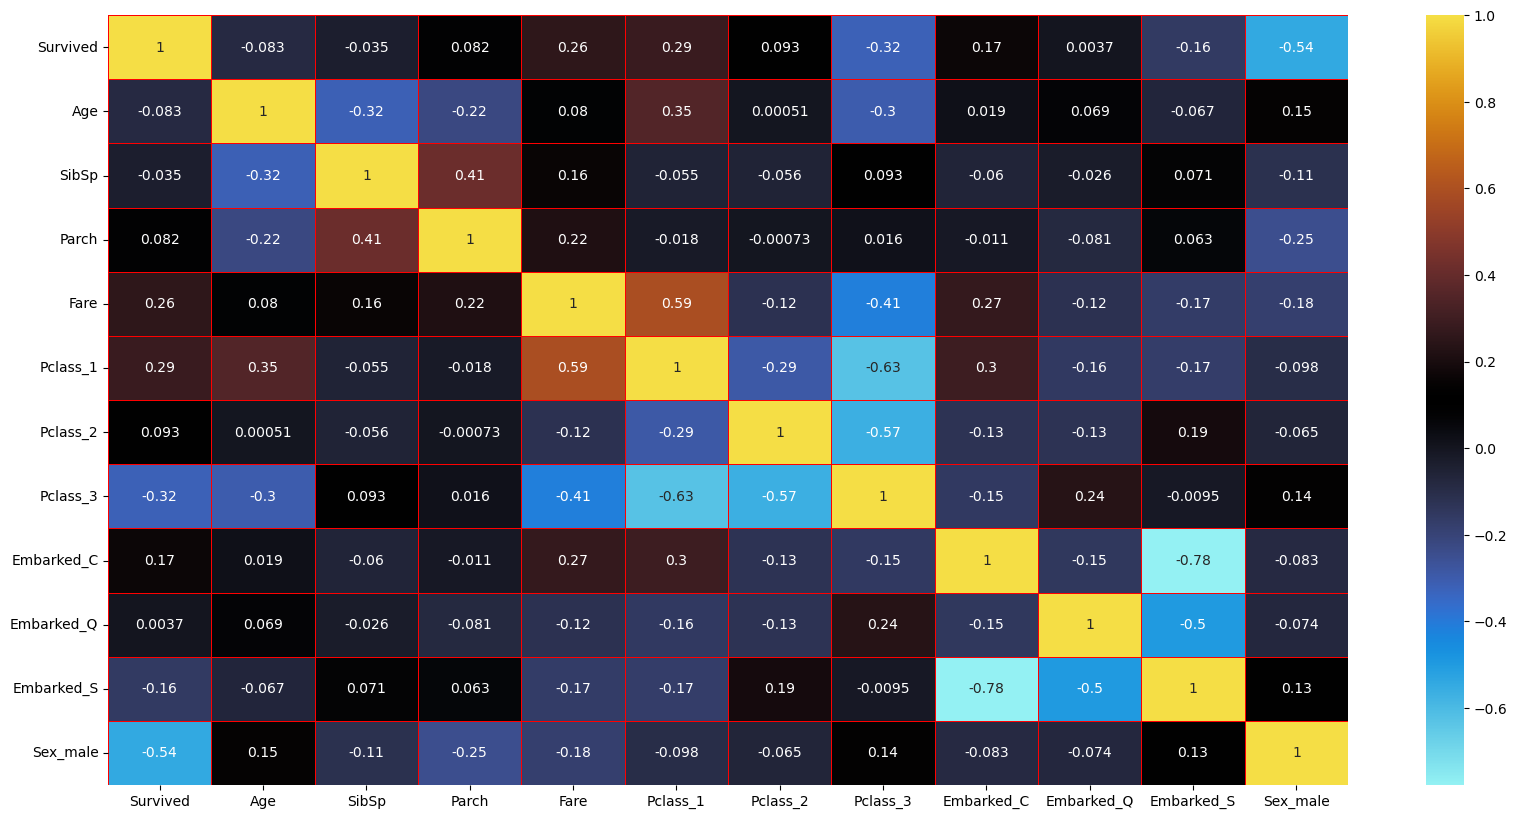

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(), annot= True, cmap = 'cmr.iceburn', linecolor= 'r', linewidths=0.5)

## Plotting the Scatterplot Matrix

array([[<Axes: xlabel='Survived', ylabel='Survived'>,
        <Axes: xlabel='Age', ylabel='Survived'>,
        <Axes: xlabel='SibSp', ylabel='Survived'>,
        <Axes: xlabel='Parch', ylabel='Survived'>,
        <Axes: xlabel='Fare', ylabel='Survived'>,
        <Axes: xlabel='Pclass_1', ylabel='Survived'>,
        <Axes: xlabel='Pclass_2', ylabel='Survived'>,
        <Axes: xlabel='Pclass_3', ylabel='Survived'>,
        <Axes: xlabel='Embarked_C', ylabel='Survived'>,
        <Axes: xlabel='Embarked_Q', ylabel='Survived'>,
        <Axes: xlabel='Embarked_S', ylabel='Survived'>,
        <Axes: xlabel='Sex_male', ylabel='Survived'>],
       [<Axes: xlabel='Survived', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='SibSp', ylabel='Age'>,
        <Axes: xlabel='Parch', ylabel='Age'>,
        <Axes: xlabel='Fare', ylabel='Age'>,
        <Axes: xlabel='Pclass_1', ylabel='Age'>,
        <Axes: xlabel='Pclass_2', ylabel='Age'>,
        <Axes: xlabel='Pclass_3'

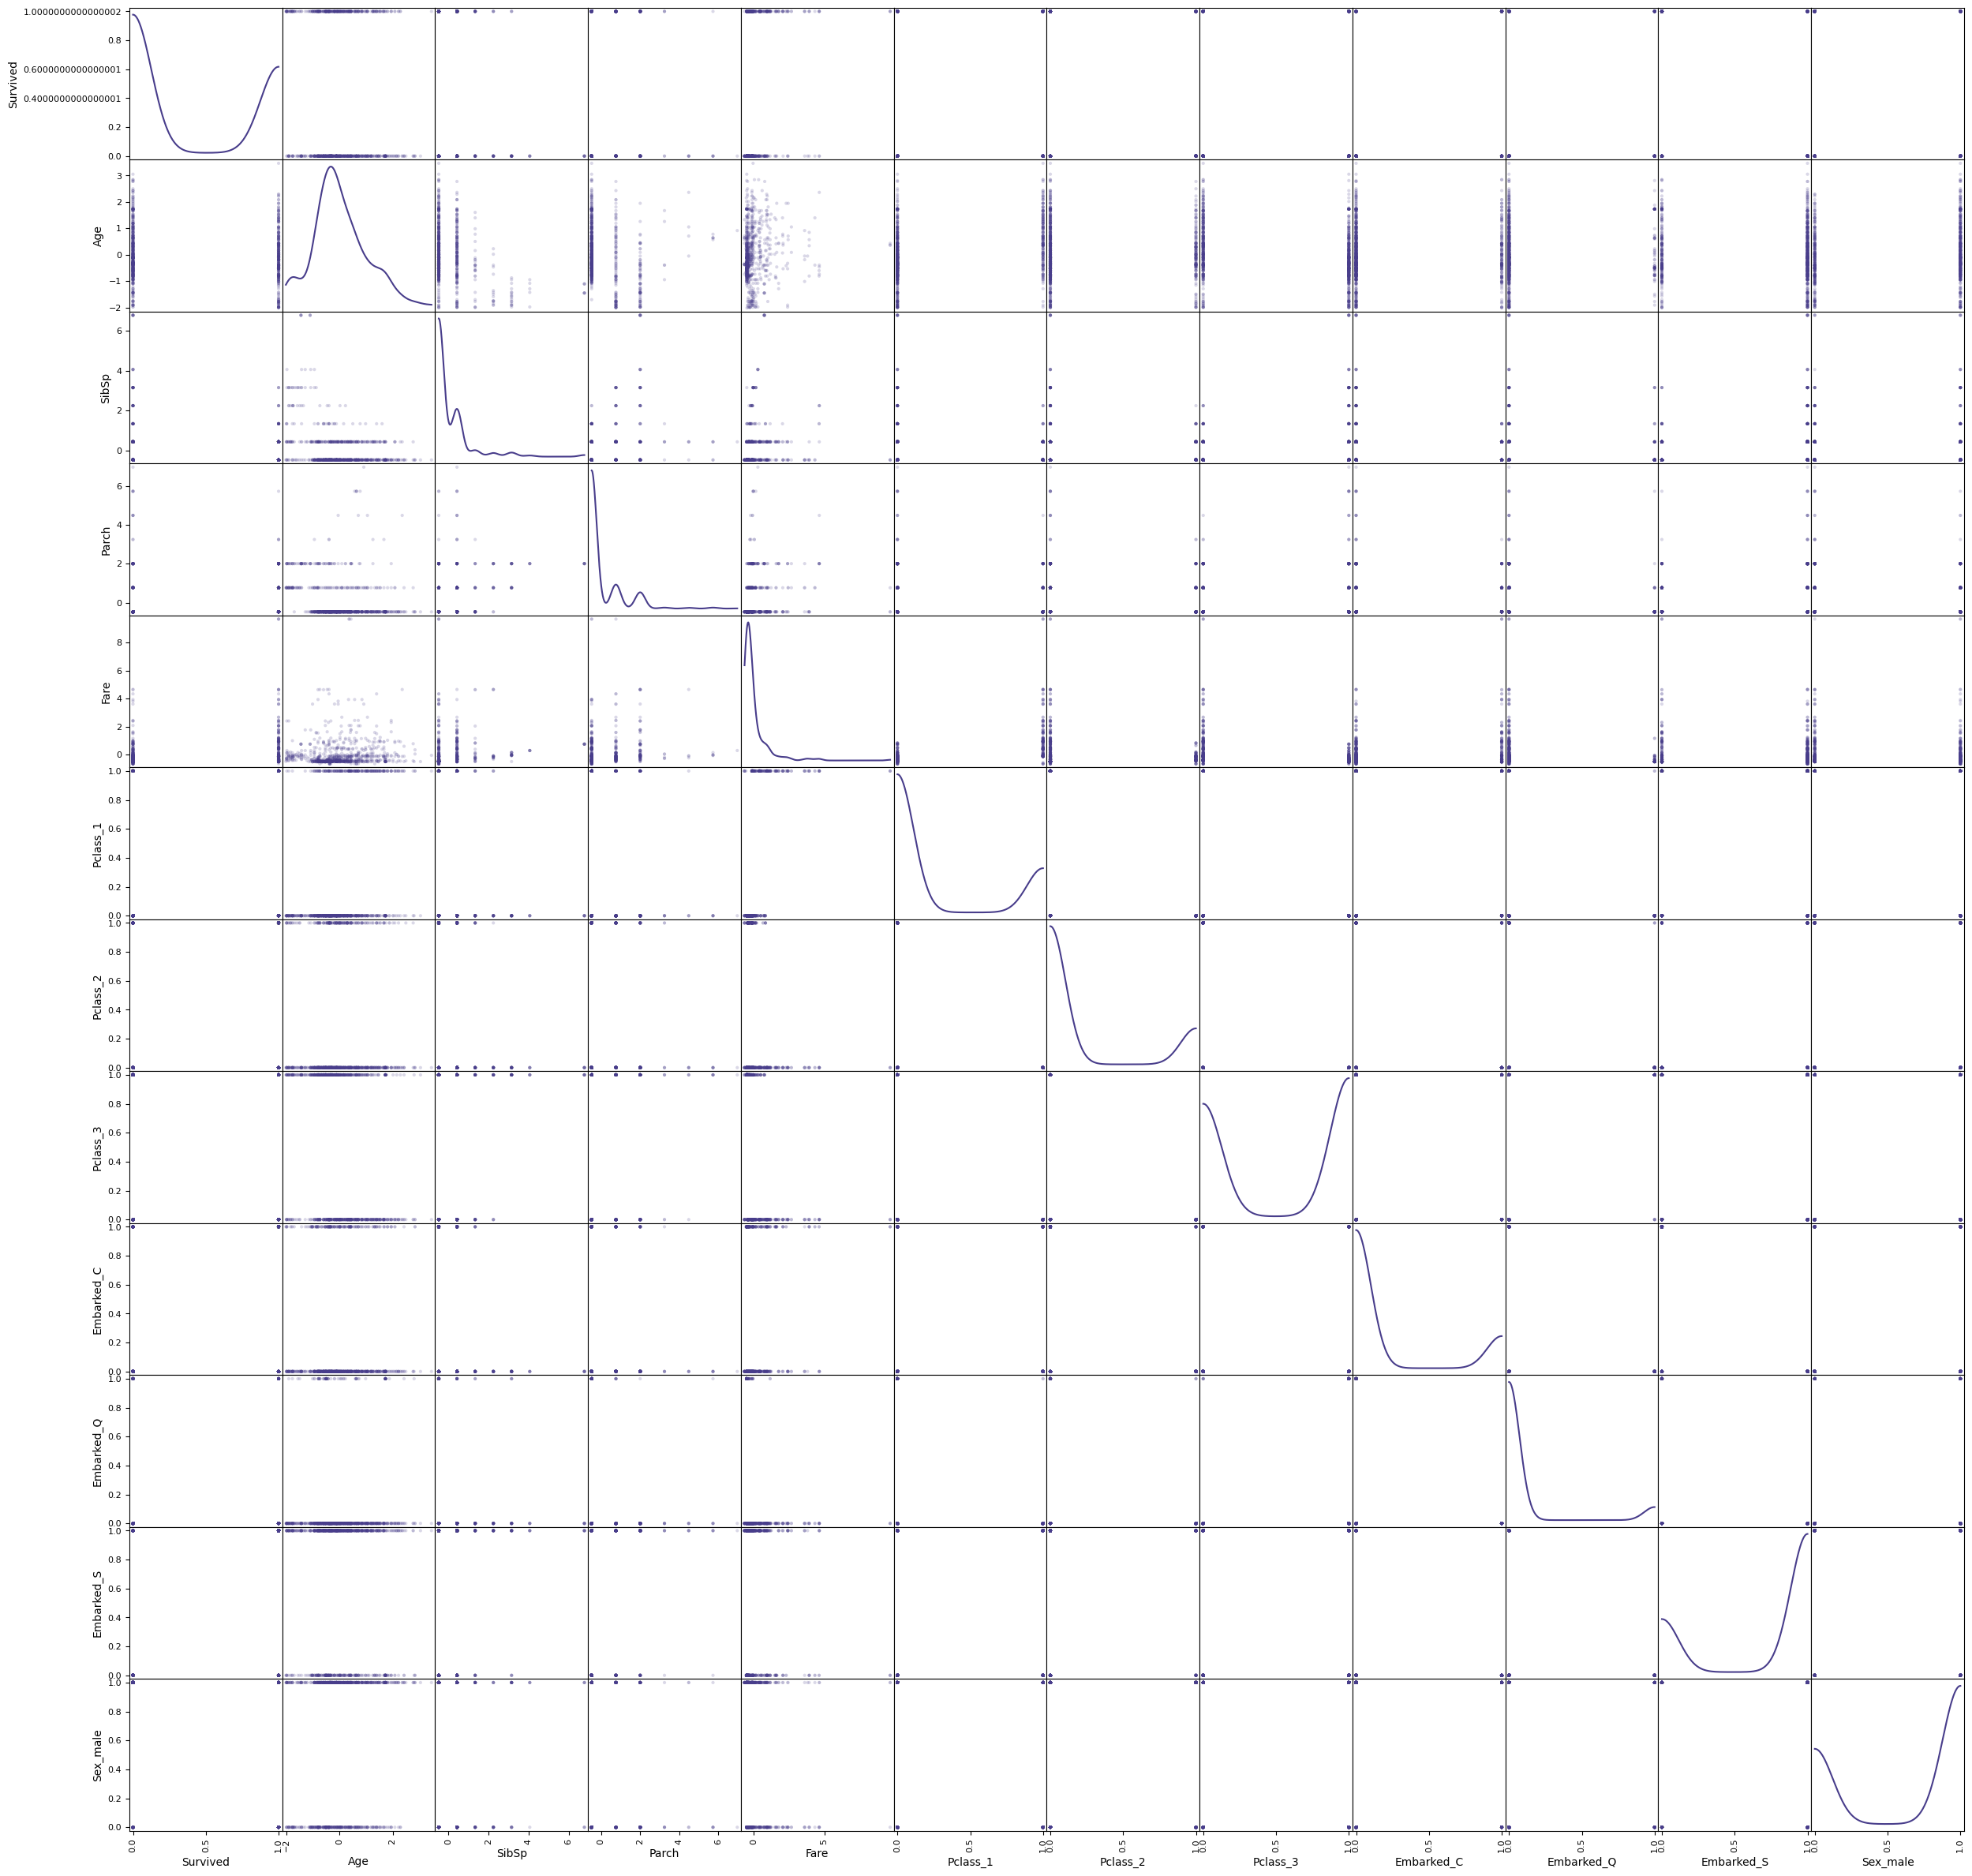

In [25]:
pd.plotting.scatter_matrix(train, alpha=0.2, figsize=(30,30), diagonal='kde', density_kwds = {"c": 'darkslateblue'}, c = 'darkslateblue')

The features are very nice, almost no collineaity

# Finding the optimal model

## Imports

In [1]:
# Resuming the session
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

## Read pre-processed data

In [2]:
train = pd.read_csv("Datasets/Titanic/train_processed.csv")

train = train.sample(frac = 1, random_state = 852)

X = train.drop(["Survived"], axis = 1)
y = train["Survived"]

## Cross Validation testing of different models

### Cross Validation Helper function

In [3]:
from sklearn.model_selection import cross_validate

def print_v(content, verbose): # Implement verbosity
    if verbose:
        print(content)

def cv_score_std(cv_dict):
    score_array = cv_dict["test_score"]
    return score_array.mean(), score_array.std() 

# models: list of models must satisfy the sklearn API interface
def cross_validate_many_estimators(models, cv_params, X, y, verbose = False):
    # Initialize function variables for result storage
    model_scores = []
    model_stds = []
    best_model_index = -1
    best_model_score = -1
    
    # Loop through all models
    for i, model in enumerate(models):
        
        # Performing CV
        cv_results = cross_validate(estimator = model, X = X, y = y, **cv_params)
        score, std = cv_score_std(cv_results)
        print_v(f"Model: {model}, score: {score}, std: {std}", verbose)
        
        # Storing Results
        model_scores.append(score)
        model_stds.append(std)
        
        # Updating best model
        if score > best_model_score:
            best_model_score = score
            best_model_index = i
    
    # Print Results
    print_v("###########################################", verbose)
    print_v("############### Test Results ##############", verbose)
    print_v("###########################################", verbose)
    print_v("", verbose)
    print_v(f"Best model is {models[best_model_index]} with score: {model_scores[best_model_index]} and std: {model_stds[best_model_index]}", verbose)
    
    return best_model_index, model_scores, model_stds

### Cross Validation function parameters

In [4]:
# We use these params everytime for the cross_validate function
cv_params = {
    "scoring": "f1",
    "cv": 10,
    "n_jobs": 4,
    "error_score": "raise",
    "verbose": 0
}

### Preparing models to be tested

Mom: We have hyper-parameter tuning at home

Hyper-parameter tuning at home:

In [18]:
# Initializing list of models
models_list = []

# set randomness seed for reproducability
random_state = 1337

# Import utils
from itertools import product

# Import models
# Linear Models
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# Discrete Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# Adding model to list

# Logistic Regression (With different l1, l2 penanty ratios)
ratios = np.linspace(0, 1, 101) 

for ratio in ratios:
    # Need to use SAGA solver since we use elasticnet solver
    model = LogisticRegression(penalty = "elasticnet", random_state = random_state, solver = "saga", max_iter = 1000, l1_ratio = ratio)
    models_list.append(model)
    
# Ridge Classifier
alphas = np.linspace(0, 1, 101)

for alpha in alphas:
    model = RidgeClassifier(alpha = alpha, random_state = random_state)
    models_list.append(model)
    
# C-Support Vector Classification

c_values = [0.1, 1, 10, 100]
gammas = ["scale", "auto"]
kernals = ["linear","rbf","sigmoid"]

for c, kernal, gamma in product(c_values, kernals, gammas):
    model = SVC(C = c, kernel = kernal, gamma = gamma)
    models_list.append(model)
    
# Naive Bayes (low/no correlation between data)
models_list.append(GaussianNB())

# KNN Classifier (bad algo adding for demo purposes only)
for k in range(3,8):
    model = KNeighborsClassifier(n_neighbors=5, weights = "distance")
    models_list.append(model)

# Random Forest
rf_gini = RandomForestClassifier(criterion = "gini", min_samples_split = 3, random_state = random_state)
rf_log_loss = RandomForestClassifier(criterion = "log_loss", min_samples_split = 3, random_state = random_state)
models_list.append(rf_gini)
models_list.append(rf_log_loss)

# LightGBM
lgbm_gbdt = LGBMClassifier(boosting_type="gbdt",random_state = random_state, bagging_freq=5, bagging_fraction=0.8, feature_fraction=0.8, verbosity = 0)
lgbm_rf = LGBMClassifier(boosting_type="rf",random_state = random_state, bagging_freq=5, bagging_fraction=0.8, feature_fraction=0.8, verbosity = 0)
models_list.append(lgbm_gbdt)
models_list.append(lgbm_rf)

# Catboost
cb_clf = CatBoostClassifier(verbose = 0, random_state = random_state)
models_list.append(cb_clf)

# XGboost
xgb_clf = XGBClassifier(random_state = random_state, verbosity = 0)
models_list.append(xgb_clf)

### Testing the models

In [19]:
cross_validate_many_estimators(models = models_list, cv_params = cv_params, X = X, y = y, verbose = True)

Model: LogisticRegression(l1_ratio=0.0, max_iter=1000, penalty='elasticnet',
                   random_state=1337, solver='saga'), score: 0.7236568815965871, std: 0.059843503741086115
Model: LogisticRegression(l1_ratio=0.01, max_iter=1000, penalty='elasticnet',
                   random_state=1337, solver='saga'), score: 0.7236568815965871, std: 0.059843503741086115
Model: LogisticRegression(l1_ratio=0.02, max_iter=1000, penalty='elasticnet',
                   random_state=1337, solver='saga'), score: 0.7236568815965871, std: 0.059843503741086115
Model: LogisticRegression(l1_ratio=0.03, max_iter=1000, penalty='elasticnet',
                   random_state=1337, solver='saga'), score: 0.7236568815965871, std: 0.059843503741086115
Model: LogisticRegression(l1_ratio=0.04, max_iter=1000, penalty='elasticnet',
                   random_state=1337, solver='saga'), score: 0.7236568815965871, std: 0.059843503741086115
Model: LogisticRegression(l1_ratio=0.05, max_iter=1000, penalty='elasticnet'

/home/shivvorz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.3997e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/shivvorz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.64628e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/shivvorz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.56664e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model: RidgeClassifier(alpha=0.0, random_state=1337), score: 0.713348075340368, std: 0.0605918413035144
Model: RidgeClassifier(alpha=0.01, random_state=1337), score: 0.7212140979627558, std: 0.058176682271875176
Model: RidgeClassifier(alpha=0.02, random_state=1337), score: 0.7212140979627558, std: 0.058176682271875176
Model: RidgeClassifier(alpha=0.03, random_state=1337), score: 0.7212140979627558, std: 0.058176682271875176
Model: RidgeClassifier(alpha=0.04, random_state=1337), score: 0.7212140979627558, std: 0.058176682271875176
Model: RidgeClassifier(alpha=0.05, random_state=1337), score: 0.7212140979627558, std: 0.058176682271875176
Model: RidgeClassifier(alpha=0.06, random_state=1337), score: 0.7212140979627558, std: 0.058176682271875176
Model: RidgeClassifier(alpha=0.07, random_state=1337), score: 0.7212140979627558, std: 0.058176682271875176
Model: RidgeClassifier(alpha=0.08, random_state=1337), score: 0.7212140979627558, std: 0.058176682271875176
Model: RidgeClassifier(alpha=0.0

(236,
 [0.7236568815965871,
  0.7236568815965871,
  0.7236568815965871,
  0.7236568815965871,
  0.7236568815965871,
  0.7236568815965871,
  0.7236568815965871,
  0.7236568815965871,
  0.7236568815965871,
  0.7236568815965871,
  0.7236568815965871,
  0.7236568815965871,
  0.7236568815965871,
  0.7236568815965871,
  0.7236568815965871,
  0.7236568815965871,
  0.7223588046735102,
  0.7223588046735102,
  0.7223588046735102,
  0.7223588046735102,
  0.7223588046735102,
  0.7223588046735102,
  0.7223588046735102,
  0.7223588046735102,
  0.7223588046735102,
  0.7223588046735102,
  0.7223588046735102,
  0.7223588046735102,
  0.7223588046735102,
  0.7223588046735102,
  0.7223588046735102,
  0.7223588046735102,
  0.7223588046735102,
  0.7223588046735102,
  0.7223588046735102,
  0.7223588046735102,
  0.7223588046735102,
  0.7223588046735102,
  0.7223588046735102,
  0.7223588046735102,
  0.7223588046735102,
  0.7223588046735102,
  0.7223588046735102,
  0.7223588046735102,
  0.7223588046735102,
  0.

# Getting answers

## Imports

In [1]:
# Resuming the session
import numpy as np
import pandas as pd

## Read Dataset

In [2]:
train = pd.read_csv("Datasets/Titanic/train_processed.csv")
test = pd.read_csv("Datasets/Titanic/test_processed.csv")

train_X = train.drop(["Survived"], axis = 1)
train_y = train["Survived"]

test_id = test["PassengerId"]
test_X = test.drop(["PassengerId"], axis = 1)

## Creating our Prediction

From the previous section, we obtained the best results from CatBoostClassifier, so it will be used.

In [4]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(n_estimators= 100000)
clf.fit(train_X, train_y)
test_y = clf.predict(test_X)

test_y

Learning rate set to 0.000144
0:	learn: 0.6930441	total: 813us	remaining: 1m 21s
1:	learn: 0.6929469	total: 1.57ms	remaining: 1m 18s
2:	learn: 0.6928520	total: 2.2ms	remaining: 1m 13s
3:	learn: 0.6927493	total: 2.98ms	remaining: 1m 14s
4:	learn: 0.6926542	total: 3.72ms	remaining: 1m 14s
5:	learn: 0.6925561	total: 4.42ms	remaining: 1m 13s
6:	learn: 0.6924619	total: 5.13ms	remaining: 1m 13s
7:	learn: 0.6923656	total: 5.79ms	remaining: 1m 12s
8:	learn: 0.6922729	total: 6.64ms	remaining: 1m 13s
9:	learn: 0.6921704	total: 7.32ms	remaining: 1m 13s
10:	learn: 0.6920644	total: 7.93ms	remaining: 1m 12s
11:	learn: 0.6919610	total: 8.77ms	remaining: 1m 13s
12:	learn: 0.6918584	total: 9.44ms	remaining: 1m 12s
13:	learn: 0.6917504	total: 10.1ms	remaining: 1m 12s
14:	learn: 0.6916482	total: 10.8ms	remaining: 1m 12s
15:	learn: 0.6915608	total: 11.4ms	remaining: 1m 11s
16:	learn: 0.6914718	total: 12.1ms	remaining: 1m 11s
17:	learn: 0.6913770	total: 12.8ms	remaining: 1m 10s
18:	learn: 0.6912736	total: 

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [8]:
df = pd.DataFrame()
df["Survived"] = pd.Series(test_y)
df = pd.concat([test_id,df], axis = 1)

df.to_csv("Datasets/Titanic/response.csv", index = False)